# 식당 평점 예측 회귀모델

## 모델링용 데이터 전처리

In [ ]:
1

1

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/빅데 식당/구군별포함데이터(사찰제외).csv')
df.head()

,Unnamed: 0,식당명,지역명_y,식당위도,식당경도,영업신고증업태명,영업인허가명,음식점소개내용,주차가능여부,와이파이제공여부,...,온라인화진행여부,수용태세지수,인기도,네이버평점,인구,호텔,문화재,관관사업체,자동차,공원
0,0,커피탱크,사하구,35.0810,128.9682,다방,휴게음식점,"부산광역시 사하구에서 어디를 갈지 고민이라면! ""커피탱크""에 가보시는 건 어떨까요?",0,0,...,0,0.17,0.00,NaN,310195,1,4,6,113804,53
1,1,명지횟집,강서구,35.1131,128.9316,한식,일반음식점,"""명지횟집""은 부산광역시 강서구에 있습니다. 지방자치단체 인증을 받은 농림축산식품부...",0,0,...,0,0.20,0.00,4.86,147347,0,16,6,81481,252
2,2,미니스톱(연산시티점),연제구,35.1813,129.0771,기타(편의점),일반음식점,"""미니스톱(연산시티점)""을 부산광역시 연제구의 가 볼 만한 식당으로 추천합니다!",0,0,...,0,0.17,0.00,NaN,208050,6,33,15,101714,30
3,3,썬더치킨,동구,35.1171,129.0395,호프/통닭,일반음식점,"부산광역시 동구에서 식당을 찾으신다면? ""썬더치킨""을 방문해보세요!",0,0,...,0,0.22,0.11,4.45,89712,7,16,42,52490,5
4,4,장터한식,동래구,35.2056,129.0872,기타,일반음식점,"부산광역시 동래구에서 맛집을 찾으신다면 ""장터한식""을 추천합니다.",0,0,...,0,0.20,0.00,NaN,268004,3,43,8,96657,46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50512 entries, 0 to 50511
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50512 non-null  int64  
 1   식당명         50512 non-null  object 
 2   지역명_y       50512 non-null  object 
 3   식당위도        50512 non-null  float64
 4   식당경도        50512 non-null  float64
 5   영업신고증업태명    50512 non-null  object 
 6   영업인허가명      50512 non-null  object 
 7   음식점소개내용     50512 non-null  object 
 8   주차가능여부      50512 non-null  int64  
 9   와이파이제공여부    50512 non-null  int64  
 10  놀이방유무       50512 non-null  int64  
 11  반려동물입장가능여부  50512 non-null  int64  
 12  다국어메뉴판제공여부  50512 non-null  int64  
 13  화장실정보내용     50512 non-null  int64  
 14  택배판매유무      50512 non-null  int64  
 15  배리어프리유무     50512 non-null  int64  
 16  배달서비스유무     50512 non-null  int64  
 17  모바일페이먼트유무   50512 non-null  int64  
 18  스마트오더유무     50512 non-null  int64  
 19  어워드정보설명     50512 non-nul

### 컬럼 명 변경

In [ ]:
df = df.rename(columns={'관관사업체':'관광사업체'})

### 식당명 변경
: 같은 이름의 식당 구분하기 위해서

In [ ]:
df['name'] = df['식당명'] + '(' + df['지역명_y'] + ')'

In [ ]:
df['식당명'].value_counts()

진주식당             27
아지트              26
옛날통닭             25
서울깍두기            20
시골밥상             19
                 ..
누리마을감자탕(하단점)      1
할렘                1
감탄떡볶이             1
본죽(부산신평가락타운점)     1
구름당(해운대좌동점)       1
Name: 식당명, Length: 43787, dtype: int64

In [ ]:
df['name'].value_counts()

팔도양곱창센타(사하구)          7
백화양곱창(중구)             7
삼성웰스토리 동래베네스트(금정구)    6
순천식당(금정구)             5
골목집(부산진구)             5
                     ..
팬도로시(부경대점)(남구)        1
소문난칼국수(남구)            1
배스킨라빈스(부산대연점)(남구)     1
처갓집 양념치킨(남구)          1
커피언니(금정구)             1
Name: name, Length: 48154, dtype: int64

In [ ]:
df.shape

(50512, 32)

### 변수 삭제

In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.drop(['식당명'], axis = 1, inplace = True)
df.drop(['지역명_y'], axis = 1, inplace = True)
df.drop(['영업신고증업태명'], axis = 1, inplace = True)
df.drop(['음식점소개내용'], axis = 1, inplace = True)
df.drop(['온라인화진행여부'], axis = 1, inplace = True) # 다국어랑 상관관계1
df.drop(['스마트오더유무'], axis = 1, inplace = True) # 모바일페이먼트랑 상관관계1
df.drop(['(RTI)지수'], axis = 1, inplace = True)
df.drop(['인기도'], axis = 1, inplace = True)

In [ ]:
df.drop(['식당위도'], axis = 1, inplace = True)
df.drop(['식당경도'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50512 entries, 0 to 50511
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   영업인허가명      50512 non-null  object 
 1   주차가능여부      50512 non-null  int64  
 2   와이파이제공여부    50512 non-null  int64  
 3   놀이방유무       50512 non-null  int64  
 4   반려동물입장가능여부  50512 non-null  int64  
 5   다국어메뉴판제공여부  50512 non-null  int64  
 6   화장실정보내용     50512 non-null  int64  
 7   택배판매유무      50512 non-null  int64  
 8   배리어프리유무     50512 non-null  int64  
 9   배달서비스유무     50512 non-null  int64  
 10  모바일페이먼트유무   50512 non-null  int64  
 11  어워드정보설명     50512 non-null  int64  
 12  수용태세지수      50512 non-null  float64
 13  네이버평점       34191 non-null  float64
 14  인구          50512 non-null  int64  
 15  호텔          50512 non-null  int64  
 16  문화재         50512 non-null  int64  
 17  관광사업체       50512 non-null  int64  
 18  자동차         50512 non-null  int64  
 19  공원          50512 non-nul

### 변수 선택 (18)

In [ ]:
df = df[['name', '네이버평점', '주차가능여부', '와이파이제공여부', '놀이방유무', '반려동물입장가능여부',
                 '다국어메뉴판제공여부', '화장실정보내용','택배판매유무', '배리어프리유무', '배달서비스유무',
                 '모바일페이먼트유무', '어워드정보설명', '수용태세지수', '인구', '호텔', '문화재', '관광사업체',
                 '자동차', '공원']]

In [ ]:
df.head()

,name,네이버평점,주차가능여부,와이파이제공여부,놀이방유무,반려동물입장가능여부,다국어메뉴판제공여부,화장실정보내용,택배판매유무,배리어프리유무,배달서비스유무,모바일페이먼트유무,어워드정보설명,수용태세지수,인구,호텔,문화재,관광사업체,자동차,공원
0,커피탱크(사하구),NaN,0,0,0,0,0,0,0,0,0,0,0,0.17,310195,1,4,6,113804,53
1,명지횟집(강서구),4.86,0,0,0,0,0,0,0,0,0,0,1,0.20,147347,0,16,6,81481,252
2,미니스톱(연산시티점)(연제구),NaN,0,0,0,0,0,0,0,0,0,0,0,0.17,208050,6,33,15,101714,30
3,썬더치킨(동구),4.45,0,0,0,0,0,0,0,0,1,0,0,0.22,89712,7,16,42,52490,5
4,장터한식(동래구),NaN,0,0,0,0,0,0,0,0,0,0,0,0.20,268004,3,43,8,96657,46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50512 entries, 0 to 50511
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        50512 non-null  object 
 1   네이버평점       34191 non-null  float64
 2   주차가능여부      50512 non-null  int64  
 3   와이파이제공여부    50512 non-null  int64  
 4   놀이방유무       50512 non-null  int64  
 5   반려동물입장가능여부  50512 non-null  int64  
 6   다국어메뉴판제공여부  50512 non-null  int64  
 7   화장실정보내용     50512 non-null  int64  
 8   택배판매유무      50512 non-null  int64  
 9   배리어프리유무     50512 non-null  int64  
 10  배달서비스유무     50512 non-null  int64  
 11  모바일페이먼트유무   50512 non-null  int64  
 12  어워드정보설명     50512 non-null  int64  
 13  수용태세지수      50512 non-null  float64
 14  인구          50512 non-null  int64  
 15  호텔          50512 non-null  int64  
 16  문화재         50512 non-null  int64  
 17  관광사업체       50512 non-null  int64  
 18  자동차         50512 non-null  int64  
 19  공원          50512 non-nul

In [ ]:
df.to_csv('/content/drive/MyDrive/빅데 식당/모델용 데이터.csv', index = False)

## 모델링

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/데이터/빅페 부산식당/모델용 데이터.csv')

In [3]:
df.drop(['수용태세지수'], inplace = True, axis = 1)

### train/ test

In [4]:
train = df.dropna(axis=0)
train.head()

,name,네이버평점,주차가능여부,와이파이제공여부,놀이방유무,반려동물입장가능여부,다국어메뉴판제공여부,화장실정보내용,택배판매유무,배리어프리유무,배달서비스유무,모바일페이먼트유무,어워드정보설명,인구,호텔,문화재,관광사업체,자동차,공원
1,명지횟집(강서구),4.86,0,0,0,0,0,0,0,0,0,0,1,147347,0,16,6,81481,252
3,썬더치킨(동구),4.45,0,0,0,0,0,0,0,0,1,0,0,89712,7,16,42,52490,5
8,조은데이(사상구),3.75,0,0,0,0,0,0,0,0,0,0,0,212771,3,7,8,89693,40
11,카페루미(경성대점)(남구),5.00,0,0,0,0,1,0,0,0,0,0,0,267422,2,53,13,99590,37
13,백구당(중구),4.40,0,0,0,0,1,0,0,0,0,0,0,42609,8,6,30,35408,4


In [5]:
train.shape

(34191, 19)

In [6]:
test = df[df['네이버평점'].isna()]

In [7]:
test.shape # 여기서 일부 사용 train[:1000]

(16321, 19)

In [8]:
#목적변수가 네이버평점
X = train.iloc[:, 2:]
y = train[['네이버평점']]

In [9]:
# 학습 데이터와 검증 데이터 분리하기
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=33)

In [10]:
#PCA를 진행할 때는 표준화를 먼저 하고 처리를 한다. 
#표준화
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()

X_train_num = X_train[['인구','호텔','문화재','관광사업체','자동차','공원']]
X_val_num = X_val[['인구','호텔','문화재','관광사업체','자동차','공원']]

X_train_std = scaler.fit_transform(X_train_num)
X_val_std = scaler.transform(X_val_num)

In [11]:
X_train_cat = X_train.drop(['인구','호텔','문화재','관광사업체','자동차','공원'], axis=1)
X_train_cat = X_train_cat.reset_index(drop=True)

X_val_cat = X_val.drop(['인구','호텔','문화재','관광사업체','자동차','공원'], axis=1)
X_val_cat = X_val_cat.reset_index(drop=True)

In [12]:
X_train_std = pd.DataFrame(X_train_std, columns=['인구','호텔','문화재','관광사업체','자동차','공원'])

In [13]:
X_val_std = pd.DataFrame(X_val_std, columns=['인구','호텔','문화재','관광사업체','자동차','공원'])

In [14]:
X_val_std

,인구,호텔,문화재,관광사업체,자동차,공원
0,-0.663317,-0.584383,0.824160,-0.833975,-0.515916,2.245955
1,0.468712,-0.955863,-0.839121,-1.007414,0.118763,0.243161
2,0.277212,-0.584383,0.600256,-0.255845,0.004919,-0.419180
3,0.733079,-0.770123,-0.967066,-0.660536,0.403387,-0.166860
4,0.733079,-0.770123,-0.967066,-0.660536,0.403387,-0.166860
...,...,...,...,...,...,...
6834,1.220215,1.087277,-0.455287,1.247295,1.222022,-0.403410
6835,1.702257,2.758936,0.152450,2.461368,2.191841,0.164311
6836,-0.663317,-0.584383,0.824160,-0.833975,-0.515916,2.245955
6837,-0.355563,0.158577,-0.039467,-0.140219,0.064462,-0.529570


In [15]:
X_train = pd.concat([X_train_std, X_train_cat], axis = 1)
X_train

,인구,호텔,문화재,관광사업체,자동차,공원,주차가능여부,와이파이제공여부,놀이방유무,반려동물입장가능여부,다국어메뉴판제공여부,화장실정보내용,택배판매유무,배리어프리유무,배달서비스유무,모바일페이먼트유무,어워드정보설명
0,-1.002523,-0.955863,-0.583232,-0.660536,-0.502740,2.971377,1,0,0,0,1,0,0,0,0,0,1
1,-0.663317,-0.584383,0.824160,-0.833975,-0.515916,2.245955,0,0,0,0,0,0,0,0,0,0,0
2,1.220215,1.087277,-0.455287,1.247295,1.222022,-0.403410,1,0,0,0,1,1,0,0,0,0,0
3,-0.688491,1.273017,-0.519260,-0.602723,0.044474,-0.592650,0,0,0,0,0,0,0,0,0,0,0
4,0.733079,-0.770123,-0.967066,-0.660536,0.403387,-0.166860,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27347,0.733079,-0.770123,-0.967066,-0.660536,0.403387,-0.166860,0,0,0,0,0,0,0,0,0,0,0
27348,1.220215,1.087277,-0.455287,1.247295,1.222022,-0.403410,0,0,0,0,0,0,0,0,1,0,0
27349,-1.431010,-0.398643,1.207994,-0.891788,-1.933402,-0.797661,1,0,0,0,1,0,0,0,0,0,0
27350,-1.616786,0.344317,-0.583232,1.420734,-1.315459,-0.923821,0,0,0,0,1,0,0,0,0,0,0


In [16]:
X_val = pd.concat([X_val_std, X_val_cat], axis = 1)
X_val

,인구,호텔,문화재,관광사업체,자동차,공원,주차가능여부,와이파이제공여부,놀이방유무,반려동물입장가능여부,다국어메뉴판제공여부,화장실정보내용,택배판매유무,배리어프리유무,배달서비스유무,모바일페이먼트유무,어워드정보설명
0,-0.663317,-0.584383,0.824160,-0.833975,-0.515916,2.245955,0,0,0,0,0,0,0,0,0,0,0
1,0.468712,-0.955863,-0.839121,-1.007414,0.118763,0.243161,0,0,0,0,0,0,0,0,0,0,0
2,0.277212,-0.584383,0.600256,-0.255845,0.004919,-0.419180,0,0,0,0,0,0,0,0,0,1,0
3,0.733079,-0.770123,-0.967066,-0.660536,0.403387,-0.166860,0,0,0,0,1,0,0,0,1,0,0
4,0.733079,-0.770123,-0.967066,-0.660536,0.403387,-0.166860,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,1.220215,1.087277,-0.455287,1.247295,1.222022,-0.403410,1,0,0,0,0,1,0,0,0,0,0
6835,1.702257,2.758936,0.152450,2.461368,2.191841,0.164311,0,0,0,0,1,0,0,0,0,0,1
6836,-0.663317,-0.584383,0.824160,-0.833975,-0.515916,2.245955,1,1,0,0,1,0,0,0,0,0,0
6837,-0.355563,0.158577,-0.039467,-0.140219,0.064462,-0.529570,0,0,0,0,0,0,0,0,0,0,0


### 기본모델

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 105 kB/s 


In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor, XGBClassifier, XGBRFRegressor, XGBRFClassifier
from lightgbm import LGBMRegressor,LGBMClassifier
from catboost import CatBoostRegressor,CatBoostClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
def regression_model(model):
    # Obtain scores of cross-validation using 10 splits and mean squared error
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)

    # Take square root of the scores
    rmse = (-scores)**0.5

    # Return mean score
    return rmse.mean()

In [ ]:
regression_model(LinearRegression())

0.28885655028778817

In [ ]:
regression_model(RandomForestRegressor())

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.29144580485291244

In [ ]:
regression_model(DecisionTreeRegressor())

0.29322794803436275

In [ ]:
regression_model(XGBRegressor())

[11:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.28859893391454977

In [ ]:
regression_model(LGBMRegressor())

0.2892137586288398

In [ ]:
regression_model(CatBoostRegressor(n_estimators=100))

Learning rate set to 0.433421
0:	learn: 0.2918901	total: 4.91ms	remaining: 486ms
1:	learn: 0.2911349	total: 9.37ms	remaining: 459ms
2:	learn: 0.2906865	total: 13.5ms	remaining: 437ms
3:	learn: 0.2904762	total: 18ms	remaining: 432ms
4:	learn: 0.2903014	total: 22.4ms	remaining: 426ms
5:	learn: 0.2902121	total: 26.9ms	remaining: 421ms
6:	learn: 0.2901819	total: 30.9ms	remaining: 411ms
7:	learn: 0.2901280	total: 35.1ms	remaining: 404ms
8:	learn: 0.2900846	total: 39.4ms	remaining: 399ms
9:	learn: 0.2900236	total: 43.9ms	remaining: 395ms
10:	learn: 0.2899882	total: 48.1ms	remaining: 389ms
11:	learn: 0.2899537	total: 52.4ms	remaining: 384ms
12:	learn: 0.2898948	total: 56.8ms	remaining: 380ms
13:	learn: 0.2898643	total: 61.1ms	remaining: 375ms
14:	learn: 0.2898548	total: 65.8ms	remaining: 373ms
15:	learn: 0.2898015	total: 69.9ms	remaining: 367ms
16:	learn: 0.2897908	total: 74.6ms	remaining: 364ms
17:	learn: 0.2897472	total: 78.8ms	remaining: 359ms
18:	learn: 0.2897088	total: 83.6ms	remaining: 

0.28995480611741653

### LightGBM

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold

def randomized_search_reg(model,params, cv=5,runs=10):

    
    rand_reg = RandomizedSearchCV(model, params, n_iter=runs, scoring='neg_mean_squared_error', 
                                  cv=5, n_jobs=-1, random_state=2)
    
    rand_reg.fit(X_train, y_train)

    best_model = rand_reg.best_estimator_
    best_params = rand_reg.best_params_

    print("Best params:", best_params)
    
    best_score = np.sqrt(-rand_reg.best_score_)
    print("Training score: {:.3f}".format(best_score))
    return best_model

In [ ]:
xg_model=XGBRegressor(random_state=2, n_jobs=-1)

cv=KFold(n_splits=3,shuffle=True,random_state=0)
params={'n_estimators':[150,170,200],'learning_rate':[0.03,0.05,0.07],
                      'max_depth':[7,8,9],'min_child_weight':[3,4,5],
                      'subsample':[0.45,0.5,0.55],'colsample_bytree':[0.90,0.95,1]}
best_model=randomized_search_reg(xg_model,params,cv=cv,runs=20)

y_pred = best_model.predict(X_val)

from sklearn.metrics import mean_squared_error
rmse_test = mean_squared_error(y_val, y_pred)**0.5
print('Test score: {:.3f}'.format(rmse_test))

[11:30:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best params: {'subsample': 0.55, 'n_estimators': 200, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.03, 'colsample_bytree': 1}
Training score: 0.289
Test score: 0.288


In [ ]:
lgb_model=LGBMRegressor(random_state=2, n_jobs=-1)

cv=KFold(n_splits=3,shuffle=True,random_state=0)
params={'n_estimators':[140, 150,160],'learning_rate':[0.05,0.07, 0.09],
                      'max_depth':[8,9,10],'min_child_weight':[3,4,5],
                      'subsample':[0.4,0.45,0.5],'colsample_bytree':[0.8,0.9,0.95]}
best_model=randomized_search_reg(lgb_model,params,cv=cv,runs=20)

y_pred = best_model.predict(X_val)

from sklearn.metrics import mean_squared_error
rmse_test = mean_squared_error(y_val, y_pred)**0.5
print('Test score: {:.3f}'.format(rmse_test))

Best params: {'subsample': 0.45, 'n_estimators': 140, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.07, 'colsample_bytree': 0.9}
Training score: 0.270
Test score: 0.268


In [18]:
import joblib

In [ ]:
joblib.dump(best_model, '/content/drive/Shareddrives/빅데이터 페스티벌/데이터/1111_model.pkl')

['/content/drive/Shareddrives/빅데이터 페스티벌/데이터/1111_model.pkl']

In [19]:
model = joblib.load('/content/drive/Shareddrives/빅데이터 페스티벌/데이터/1111_model.pkl')

[11:51:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## 변수중요도

In [27]:
# 폰트 설치용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import matplotlib
get_ipython().run_line_magic('config', "InlineBackend.figure_format='retina' #화질 좋게 해주기")
# 이후에 런타임 다시 시작을 해주시면 폰트가 나옵니다!

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [23]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') 

In [24]:
import matplotlib.font_manager as fm

fontprop = fm.FontProperties(fname = 'NanumGothic', size=18)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


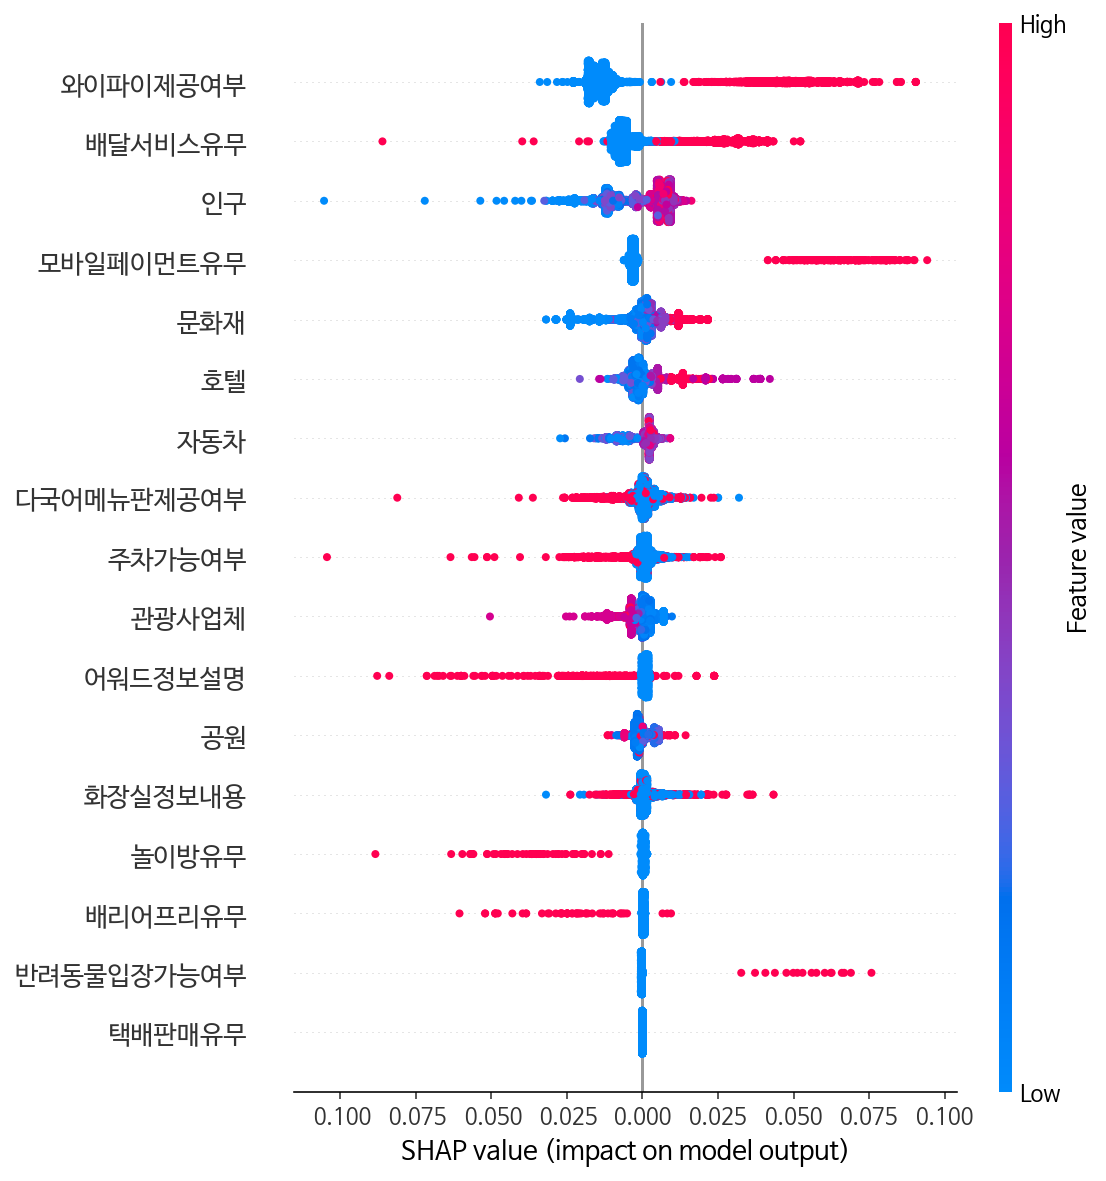

In [20]:
!pip install shap

import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)
fig = shap.summary_plot(shap_values, X_val)

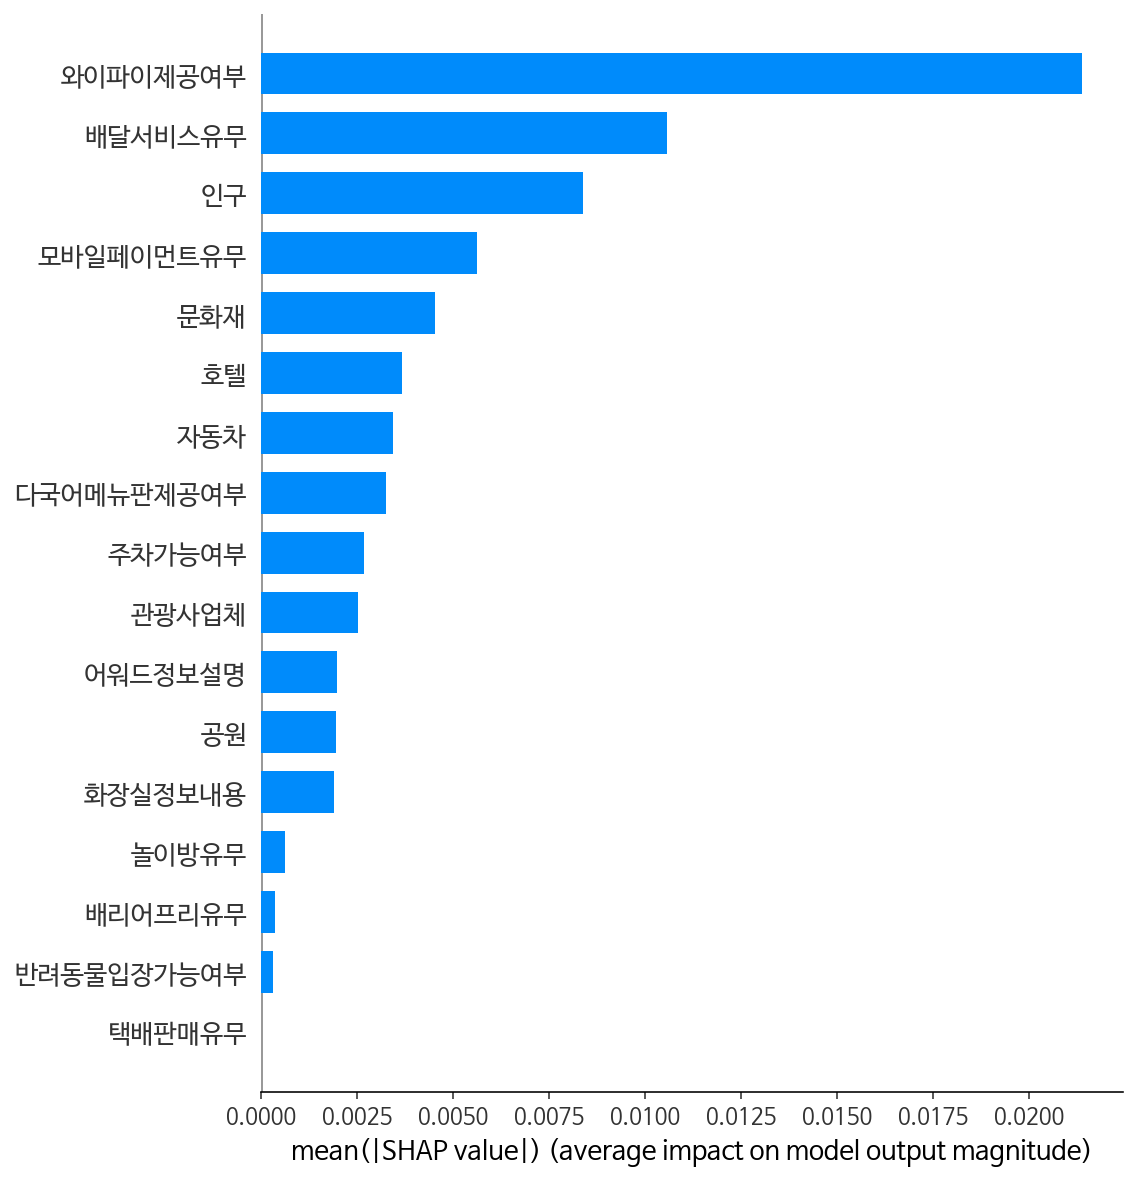

In [21]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, X_val, plot_type = "bar")